In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
enlace = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQrGe1t-qGFfGu-9SMzUW1MhHF8SUgIesdsiRHPxtT51zYw0UYMkdjgtOjC5mAXXCPoma9-4wz9MLcw/pub?gid=0&single=true&output=csv'

In [26]:
df = pd.read_csv(enlace)

In [27]:
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072.12,12729.0,1257.763541,30024676.0
1,01.02.2015,15807587.45,11636.0,1358.507000,30024676.0
2,01.03.2015,22047146.02,15922.0,1384.697024,30024676.0
3,01.04.2015,18814583.29,15227.0,1235.606705,30024676.0
4,01.05.2015,14021479.61,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN


In [28]:
df['Period'] = pd.to_datetime(df['Period'], dayfirst=True)

In [29]:
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,16010072.12,12729.0,1257.763541,30024676.0
1,2015-02-01,15807587.45,11636.0,1358.507000,30024676.0
2,2015-03-01,22047146.02,15922.0,1384.697024,30024676.0
3,2015-04-01,18814583.29,15227.0,1235.606705,30024676.0
4,2015-05-01,14021479.61,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,2022-08-01,NaN,NaN,NaN,NaN
92,2022-09-01,NaN,NaN,NaN,NaN
93,2022-10-01,NaN,NaN,NaN,NaN
94,2022-11-01,NaN,NaN,NaN,NaN


In [30]:
df.set_index('Period', inplace = True)

In [31]:
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,16010072.12,12729.0,1257.763541,30024676.0
2015-02-01,15807587.45,11636.0,1358.507000,30024676.0
2015-03-01,22047146.02,15922.0,1384.697024,30024676.0
2015-04-01,18814583.29,15227.0,1235.606705,30024676.0
2015-05-01,14021479.61,8620.0,1626.621765,30024676.0
...,...,...,...,...
2022-08-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


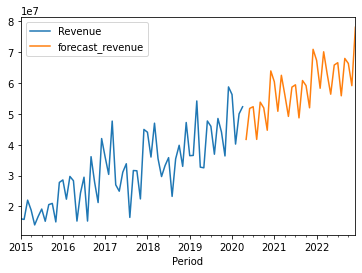

In [32]:
model1 = sm.tsa.statespace.SARIMAX(df['Revenue'],order = (1,1,1),seasonal_order=(1,1,1,12))
results = model1.fit()

# pronostico
df['forecast_revenue'] = results.predict(start=64,end=96,dynamic = True)
df[['Revenue','forecast_revenue']].plot();

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


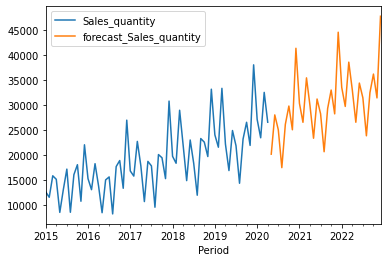

In [35]:
model2 = sm.tsa.statespace.SARIMAX(df['Sales_quantity'],order = (1,1,1),seasonal_order=(1,1,1,12))
results = model2.fit()

# pronostico
df['forecast_Sales_quantity'] = results.predict(start=64,end=96,dynamic = True)
df[['Sales_quantity','forecast_Sales_quantity']].plot();

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


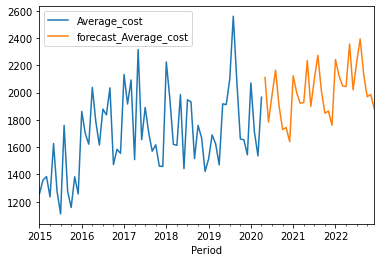

In [36]:
model3 = sm.tsa.statespace.SARIMAX(df['Average_cost'],order = (1,1,1),seasonal_order=(1,1,1,12))
results = model3.fit()

# pronostico
df['forecast_Average_cost'] = results.predict(start=64,end=96,dynamic = True)
df[['Average_cost','forecast_Average_cost']].plot();

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


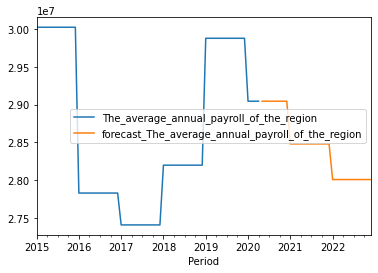

In [37]:
model4 = sm.tsa.statespace.SARIMAX(df['The_average_annual_payroll_of_the_region'],order = (1,1,1),seasonal_order=(1,1,1,12))
results = model4.fit()

# pronostico
df['forecast_The_average_annual_payroll_of_the_region'] = results.predict(start=64,end=96,dynamic = True)
df[['The_average_annual_payroll_of_the_region','forecast_The_average_annual_payroll_of_the_region']].plot();